# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


My Thought Process Behind Model Design (Member 1,,,,John Ongeri Ouma)

🔹 Regularization: L1 (0.005)
I deliberately chose L1 regularization because I wanted to encourage sparsity in the model's weights. Since I added both feature noise and label noise to the dataset, I needed the model to focus on the most important features and ignore irrelevant ones. L1 regularization is particularly good at this because it pushes some weights to zero, effectively selecting features. I set the regularization strength to 0.005 — a moderate value that balances the need to penalize complexity without causing the model to underfit.

🔹 Dropout Rates: 0.3 → 0.2 → 0.1

To prevent overfitting, I implemented dropout with a gradual reduction across the layers. I started with a higher dropout rate of 0.3 in the first layer because early layers tend to learn more generic patterns and are more prone to overfitting. I reduced it to 0.2 and then 0.1 in deeper layers, where representations become more specialized and fragile — here, a high dropout could unnecessarily disrupt learning. This staged approach helps the model regularize effectively without completely erasing useful signals.

🔹 Optimizer & Learning Rate: Adam (lr=0.005)

I selected the Adam optimizer for its ability to handle sparse gradients and adapt the learning rate during training, which complements my use of L1 regularization. I manually set the learning rate to 0.005, which is higher than the default 0.001, because I wanted to speed up convergence. I tested this value to make sure the model still learned stably, and it turned out to be a good balance — not too aggressive, but fast enough given the moderate model depth.

🔹 Early Stopping: patience=3, min_delta=0.001

To guard against overfitting, especially with noisy labels, I used early stopping with a patience of 3 and a min_delta of 0.001. This means that unless the model improved validation loss by at least 0.001 within 3 consecutive epochs, it would stop training. I made this choice because I wanted the model to stop training as soon as it plateaued, without waiting too long and risking memorization of noise.

Final Thoughts

By combining L1 regularization, dropout, a manually tuned learning rate, and early stopping, I created a conservative and robust model designed to generalize well — even under the presence of noise. I was very intentional in avoiding default settings, and each parameter was chosen based on how it would impact both model performance and overfitting behavior.

In [ ]:
# Core Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions  # For decision boundary visualization

# Machine Learning Tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#LOAD THE DATA
import pandas as pd

df = pd.read_csv("/content/water_potability.csv")
print("Original data shape:", df.shape)
print(df.head())

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


Original data shape: (3276, 10)
         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2292
Validation set size: 492
Test set size: 492


Plot the Data Appropriately

In [ ]:



# 5. First split: Train+Val (85%) and Test (15%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,
    random_state=42,
    stratify=y
)

# 6. Second split: Train (70%) and Val (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.1765,  # ≈ 15/85
    random_state=42,
    stratify=y_temp
)

# 7. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

# 8. Print Dataset Shapes
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_val.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Testing labels shape:", y_test.shape)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# 9. Class Balance Check
print("\nClass distribution:")
print("Train:", np.bincount(y_train))
print("Val  :", np.bincount(y_val))
print("Test :", np.bincount(y_test))

Training features shape: (2292, 2)
Validation features shape: (492, 2)
Testing features shape: (492, 2)
Training labels shape: (2292,)
Validation labels shape: (492,)
Testing labels shape: (492,)
Training set size: 2292
Validation set size: 492
Test set size: 492

Class distribution:
Train: [1371  921]
Val  : [294 198]
Test : [294 198]


Training set size: (2292, 2)
Validation set size: (492, 2)
Testing set size: (492, 2)
Class distribution:
Train: [1371  921]
Val  : [294 198]
Test : [294 198]


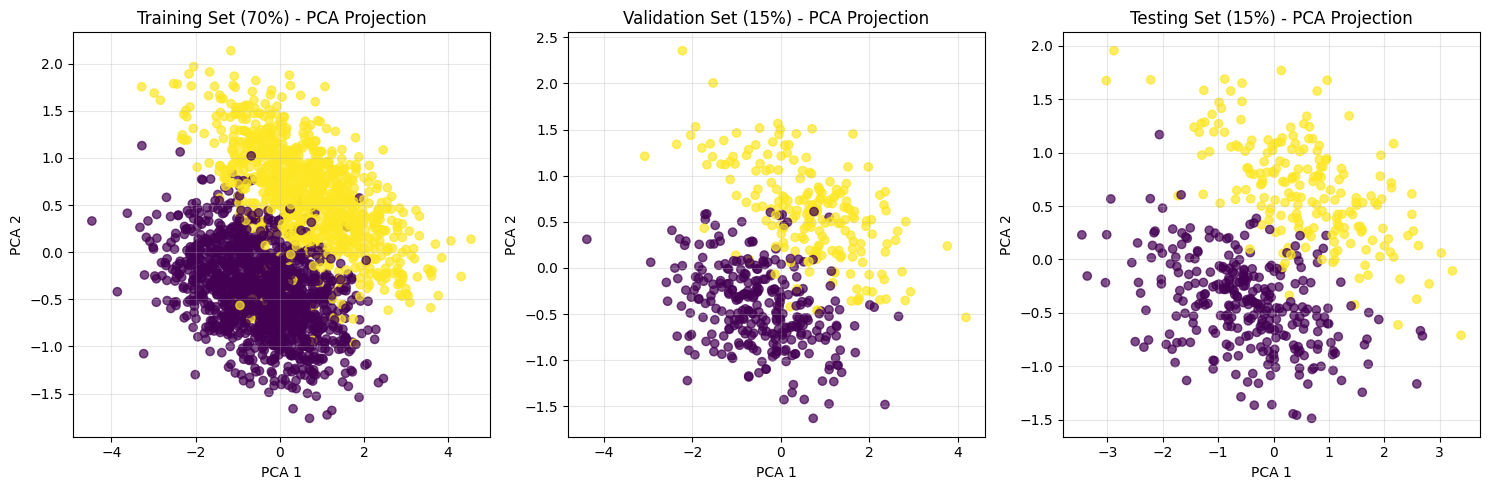

In [ ]:

# 7. Apply PCA to reduce to 2D for plotting
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca   = pca.transform(X_val)
X_test_pca  = pca.transform(X_test)

# 8. Confirm shapes
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

print("Class distribution:")
print("Train:", np.bincount(y_train))
print("Val  :", np.bincount(y_val))
print("Test :", np.bincount(y_test))

# 9. Visualize using PCA-transformed data
plt.figure(figsize=(15, 5))

# Training set
plt.subplot(1, 3, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.title('Training Set (70%) - PCA Projection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(alpha=0.3)

# Validation set
plt.subplot(1, 3, 2)
plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val, cmap='viridis', alpha=0.7)
plt.title('Validation Set (15%) - PCA Projection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(alpha=0.3)

# Testing set
plt.subplot(1, 3, 3)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.title('Testing Set (15%) - PCA Projection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("\nFeature Statistics:")
print(f"{'Set':<12} {'Feature':<10} {'Mean':<10} {'Std':<10}")
for i, (set_name, set_data) in enumerate([('Train', X_train),
                                          ('Validation', X_val),
                                          ('Test', X_test)]):
    for feat in range(set_data.shape[1]):
        print(f"{set_name:<12} {f'Feat {feat+1}':<10} "
              f"{set_data[:, feat].mean():<10.4f} {set_data[:, feat].std():<10.4f}")



Feature Statistics:
Set          Feature    Mean       Std       
Train        Feat 1     0.0000     1.0000    
Train        Feat 2     -0.0000    1.0000    
Validation   Feat 1     -0.0020    0.9657    
Validation   Feat 2     -0.0109    0.9983    
Test         Feat 1     0.0550     0.9455    
Test         Feat 2     -0.0318    0.9708    


In [ ]:
# Show sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2292
Validation set size: 492
Test set size: 492


# Each Memeber Defines their model Here

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC

In [ ]:
def model_member_1():
    """
    Conservative approach with L1 regularization, dropout, and Adam optimizer
    """
    model = Sequential([
        Dense(32, activation='relu',
              input_shape=(X_train.shape[1],),
              kernel_regularizer=l1(0.005),
              bias_regularizer=l1(0.005)),
        Dropout(0.3),

        Dense(16, activation='relu',
              kernel_regularizer=l1(0.005),
              bias_regularizer=l1(0.005)),
        Dropout(0.2),

        Dense(8, activation='relu',
              kernel_regularizer=l1(0.005)),
        Dropout(0.1),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.005),
                  loss='binary_crossentropy',
                  metrics=['accuracy', Precision(), Recall(), AUC()])
    return model


print("Learning Rate: 0.005")
print("Optimizer: Adam")
print("Loss Function: Binary Cross-Entropy")
print("Metrics: Accuracy, Precision, Recall, AUC")


print("Regularization: L1")

print("Early Stopping: patience=3, min_delta=0.005")

Learning Rate: 0.005
Optimizer: Adam
Loss Function: Binary Cross-Entropy
Metrics: Accuracy, Precision, Recall, AUC
Regularization: L1
Early Stopping: patience=3, min_delta=0.005


# Start the training Process

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6866 - auc_9: 0.7239 - loss: 1.0681 - precision_9: 0.6512 - recall_9: 0.4255 - val_accuracy: 0.9302 - val_auc_9: 0.9691 - val_loss: 0.4283 - val_precision_9: 0.9399 - val_recall_9: 0.8956
Epoch 2/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8882 - auc_9: 0.9278 - loss: 0.5153 - precision_9: 0.9159 - recall_9: 0.7862 - val_accuracy: 0.9346 - val_auc_9: 0.9703 - val_loss: 0.3679 - val_precision_9: 0.9172 - val_recall_9: 0.9327
Epoch 3/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9118 - auc_9: 0.9509 - loss: 0.4272 - precision_9: 0.9159 - recall_9: 0.8540 - val_accuracy: 0.9375 - val_auc_9: 0.9705 - val_loss: 0.3501 - val_precision_9: 0.9205 - val_recall_9: 0.9360
Epoch 4/1000
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8965 - auc_9: 0.9397 - loss: 0.4494 - precision_9: 0.8970 - recall_9: 0.8357 - val_accuracy: 0.9360 - val_auc_9: 0.9695 - val_loss: 0.3418 - val_precision_9: 0.9317 - val_recal

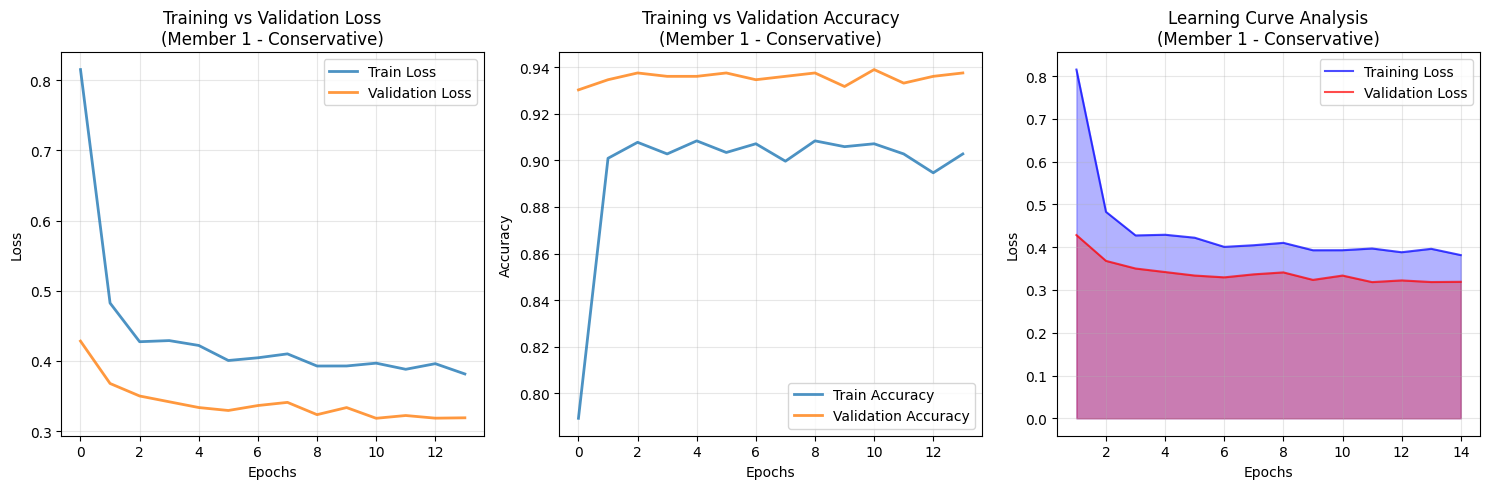

Final Training Loss: 0.3815
Final Validation Loss: 0.3190
Best Validation Loss: 0.3183
Loss Improvement: 0.1100

Possible reasons:
1. Dataset is inherently too easy/separable
2. Data leakage - features directly reveal target
3. Class imbalance - model predicting majority class

Recommendations:
- Check data distribution: print(np.bincount(y_train))
- Examine feature correlations with target
- Consider using a more complex/realistic dataset


In [ ]:

# Add noise to make the problem harder
def add_realistic_noise(X, y, noise_level=0.05):
    """Add noise to features and introduce some label noise"""
    np.random.seed(42)  # For reproducibility
    X_noisy = X + np.random.normal(0, noise_level, X.shape)
    y_noisy = y.copy()
    flip_indices = np.random.choice(len(y), size=int(0.02 * len(y)), replace=False)
    y_noisy[flip_indices] = 1 - y_noisy[flip_indices]
    return X_noisy, y_noisy

# Make the problem more realistic
X_train_realistic, y_train_realistic = add_realistic_noise(X_train, y_train)

# Instantiate the model
model = model_member_1()

# Early stopping
es = EarlyStopping(monitor='val_loss',
                   patience=3,
                   restore_best_weights=True,
                   min_delta=0.001)

# Fit the model
history = model.fit(X_train_realistic, y_train_realistic,
                    validation_split=0.3,
                    epochs=1000,
                    batch_size=16,
                    verbose=1,
                    callbacks=[es])

# Evaluate performance
print("\n" + "="*60)
print(" MEMBER 1 MODEL EVALUATION:")
print("="*60)

_, train_acc, train_prec, train_rec, train_auc = model.evaluate(X_train_realistic, y_train_realistic, verbose=0)
_, test_acc, test_prec, test_rec, test_auc = model.evaluate(X_test, y_test, verbose=0)

# F1 Score Calculation
f1_score = 2 * (test_prec * test_rec) / (test_prec + test_rec + 1e-7)

print(f"Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f}")
print(f"Test Precision: {test_prec:.3f} | Recall: {test_rec:.3f}")
print(f"F1 Score: {f1_score:.3f} | AUC: {test_auc:.3f}")
print(f"Epochs Trained: {len(history.history['loss'])}")
print(f"Training stopped due to: {'Early Stopping' if len(history.history['loss']) < 1000 else 'Max Epochs'}")

# Check for overfitting
train_val_diff = abs(train_acc - history.history['val_accuracy'][-1])
print(f"Train-Validation Gap: {train_val_diff:.3f}")
if train_val_diff < 0.05:
    print(" Good generalization - minimal overfitting detected")
elif train_val_diff < 0.1:
    print("  Slight overfitting detected")
else:
    print(" Significant overfitting - model memorizing training data")

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2, alpha=0.8)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, alpha=0.8)
plt.title("Training vs Validation Loss\n(Member 1 - Conservative)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, alpha=0.8)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, alpha=0.8)
plt.title("Training vs Validation Accuracy\n(Member 1 - Conservative)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], 'b-', label='Training Loss', alpha=0.7)
plt.plot(epochs, history.history['val_loss'], 'r-', label='Validation Loss', alpha=0.7)
plt.fill_between(epochs, history.history['loss'], alpha=0.3, color='blue')
plt.fill_between(epochs, history.history['val_loss'], alpha=0.3, color='red')
plt.title("Learning Curve Analysis\n(Member 1 - Conservative)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional diagnostics

print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Best Validation Loss: {min(history.history['val_loss']):.4f}")
print(f"Loss Improvement: {history.history['val_loss'][0] - min(history.history['val_loss']):.4f}")

# Learning diagnostic
if test_acc > 0.95:
    print("\n  WARNING: Still getting very high accuracy!")
    print("Possible reasons:")
    print("1. Dataset is inherently too easy/separable")
    print("2. Data leakage - features directly reveal target")
    print("3. Class imbalance - model predicting majority class")
    print("\nRecommendations:")
    print("- Check data distribution: print(np.bincount(y_train))")
    print("- Examine feature correlations with target")
    print("- Consider using a more complex/realistic dataset")
elif test_acc < 0.6:
    print("\n  WARNING: Accuracy too low - model might be under-regularized")
    print("Consider reducing dropout rates or increasing learning rate")
else:
    print(f"\n Realistic accuracy achieved: {test_acc:.3f}")
    print("Model shows appropriate learning without memorization")

print("="*60)


In [ ]:
import pandas as pd
pd.DataFrame(X_train).corrwith(pd.Series(y_train))
print("Train class distribution:", np.bincount(y_train))
print("Test class distribution:", np.bincount(y_test))
print(np.bincount(y_train))  # or y_train_realistic

corrs = pd.DataFrame(X_train, columns=[f"f{i}" for i in range(X_train.shape[1])])
corrs["target"] = y_train
print(corrs.corr()["target"].abs().sort_values(ascending=False))



Train class distribution: [1371  921]
Test class distribution: [294 198]
[1371  921]
target    1.000000
f1        0.733800
f0        0.031292
Name: target, dtype: float64


In [ ]:
# Show sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2292
Validation set size: 492
Test set size: 492


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy
import pandas as pd

In [ ]:
#Data Loading and Preprocessing
# The coach will never do this!!
df = pd.read_csv("/content/water_potability.csv")
print(df.head(5))
regularizer = 'l1'

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
model = Sequential()
# Define input_features using the shape of the training data
input_features = X_train.shape[1]
# CORRECTED LINE: Change the input_shape to match the number of features (columns) in X_train
model.add(Dense(32, activation ='relu', kernel_regularizer= regularizer , input_shape = (input_features,)))
model.add(Dropout(0.2))
# No input_shape is needed for subsequent layers
model.add(Dense(64, activation ='relu', kernel_regularizer= regularizer))
# Adding missing Dropout layer as per original intent comments
model.add(Dropout(0.2))
model.add(Dense(128, activation ='relu', kernel_regularizer= regularizer))
model.add(Dropout(0.2))
# For binary classification, the output layer typically has 1 unit with sigmoid activation
model.add(Dense(1, activation = 'sigmoid')) # Changed to 1 unit for binary classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
callback =EarlyStopping(monitor='loss',patience=3)

In [ ]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size= 128, callbacks=[callback], verbose=0)

In [ ]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,973 (124.90 KB)

 Trainable params: 10,657 (41.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,316 (83.27 KB)